In [86]:
# This assignment is done by CS20B1044 Avinash R Changrani

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import cv2

1. Calculate the distance between the two normalized histograms H1 and H2 using each of the following methods:

    (a) KL Distance
    (b) Bhattacharyya Distance

    H1 = [ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04]

    H2 = [ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02]

KL Distance formula: $$D_{KL}(P,Q) = \sum_{i=1}^{n} P(i) \log \frac{P(i)}{Q(i)}$$

Bhattacharyya Distance formula: $$D_{B}(P,Q) = -\log \sum_{i=1}^{n} \sqrt{P(i)Q(i)}$$

In [87]:
H1 = np.array([ 0.24, 0.2, 0.16, 0.12, 0.08, 0.04, 0.12, 0.04])
H2 = np.array([ 0.22, 0.23, 0.16, 0.13, 0.11, 0.08, 0.05, 0.02])

# (a) KL Distance
def KL_distance(H1, H2):
    return np.sum(H1 * np.log(H1/H2))

print("KL Distance between H1 and H2: ", KL_distance(H1, H2))

# (b) Bhattacharyya Distance

def Bhattacharyya_distance(H1, H2):
    return -np.log(np.sum(np.sqrt(H1*H2)))

print("Bhattacharyya Distance between H1 and H2: ", Bhattacharyya_distance(H1, H2))


KL Distance between H1 and H2:  0.06290516707464022
Bhattacharyya Distance between H1 and H2:  0.014830056106628986


Given $(hq − ht)^T = \begin{pmatrix}0.5 & 0.5 & -0.5 & -0.25 & -0.25\end{pmatrix}$ and
$
A = 
\begin{pmatrix}
1 & 0.135 & 0.195 & 0.137 & 0.157 \\
0.135 & 1 & 0.2 & 0.309 & 0.143 \\
0.195 & 0.2 & 1 & 0.157 & 0.122 \\
0.137 & 0.309 & 0.157 & 1 & 0.195 \\
0.157 & 0.143 & 0.122 & 0.195 & 1 
\end{pmatrix}
$

Find the quadratic form distance.

Quadratic form distance formula is given by:

$$
\begin{align}
d(x,y) &= \sqrt{(x-y)^T A (x-y)} \\
\end{align}
$$

where x and y are the two vectors and A is the covariance matrix.

In [88]:
# Quadratic distance = sqrt((x-y)^T * A *(x-y))

xy_t = np.array([0.5, 0.5, -0.5, -0.25, -0.25])
A = np.array([[1, 0.135, 0.195, 0.137, 0.157], [0.135, 1, 0.2, 0.309, 0.143], [0.195, 0.2, 1, 0.157, 0.122], [0.137, 0.309, 0.157, 1, 0.195], [0.157, 0.143, 0.122, 0.195, 1]])

# qudratic distance between x and y given (x-y)^T and A
def quadratic_distance(xy_t, A):
    return np.sqrt(np.dot(np.dot(xy_t, A), np.transpose(xy_t)))

print("Quadratic distance between x and y: ", quadratic_distance(xy_t, A))

Quadratic distance between x and y:  0.8078520904224981


3. Compare two text files doc1.txt and doc2.txt using cosine distance. 

    doc1.txt \
    MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are
    vectors and matrices, so you must be familiar with these before making extensive use of this program.

    doc2.txt \
    MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic
    information on using MATLAB matrix commands.

# Cosine Distance
Cosine Distance formula is given by:

$$
d_{cosine}(x,y) = 1 - \frac{x \cdot y}{||x||_2 ||y||_2}
$$

where $x$ and $y$ are two vectors.

In [89]:
# Compare two text files doc1.txt and doc2.txt using cosine distance.
doc1 = "MATLAB is a program for solving engineering and mathematical problems. The basic MATLAB objects are vectors and matrices, so you must be familiar with these before making extensive use of this program."

doc2 = "MATLAB works with essentially one kind of object, a rectangular numerical matrix. Here is some basic information on using MATLAB matrix commands."

# cosine distance between two documents
def cosine_distance(doc1, doc2):
    doc1 = doc1.split()
    doc2 = doc2.split()
    doc1 = set(doc1)
    doc2 = set(doc2)
    cos_theta = len(doc1.intersection(doc2)) / np.sqrt(len(doc1) * len(doc2))
    return 1 - cos_theta

print("Cosine distance between doc1 and doc2: ", cosine_distance(doc1, doc2))

Cosine distance between doc1 and doc2:  0.7609542781331212


Classify flower 1, 51, and 101 from the Iris Dataset (.csv file) attached along with the assignment document
into one of the three classes as given in dataset specification: \
Dataset Specifications: 
> Total number of samples = 150 \
> Number of classes = 3 (Iris setosa, Iris virginica, and Iris versicolor) \
> The number of samples in each class = 50 

Directions to classify:
1. Use features PetalLengthCm and PetalWidthCm only for classification.
2. Consider flowers 1,51 and 101 as test cases.
3. Plot the distribution of rest 147 sample points along with their classes( differentiate classes with different
colour). Consider PetalWidthCm along Y-axis and PetalLengthCm along X-axis.
4. Capture the properties of the distribution and use suitable distance metrics to classify the flowers 1,51 and
101 into one of the classes.
5. Print their class and plot the points on the previous plot with a marker differentiating the three points.

In [90]:
df = pd.read_csv("./Iris.csv")


# Use features PetalLengthCm and PetalWidthCm only for classification.
df = df[['Id','PetalLengthCm', 'PetalWidthCm', 'Species']]

df

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


In [91]:
# Consider flowers with id = 1,51 and 101 as test cases.
test = df.loc[[0, 50, 100]]

test

,Id,PetalLengthCm,PetalWidthCm,Species
0,1,1.4,0.2,Iris-setosa
50,51,4.7,1.4,Iris-versicolor
100,101,6.0,2.5,Iris-virginica


In [92]:
# drop the test cases from the dataset
df = df.drop([0, 50, 100])

df

,Id,PetalLengthCm,PetalWidthCm,Species
1,2,1.4,0.2,Iris-setosa
2,3,1.3,0.2,Iris-setosa
3,4,1.5,0.2,Iris-setosa
4,5,1.4,0.2,Iris-setosa
5,6,1.7,0.4,Iris-setosa
...,...,...,...,...
145,146,5.2,2.3,Iris-virginica
146,147,5.0,1.9,Iris-virginica
147,148,5.2,2.0,Iris-virginica
148,149,5.4,2.3,Iris-virginica


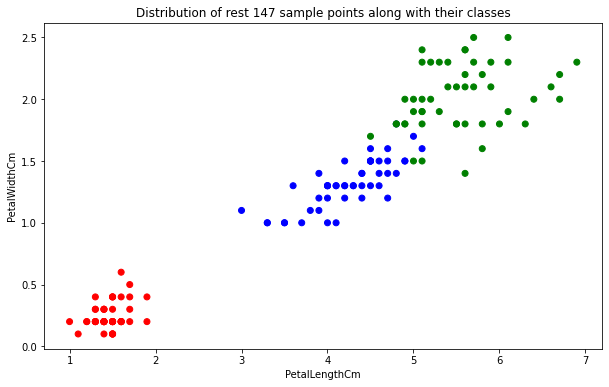

In [93]:
# Plot the distribution of rest 147 sample points along with their classes( differentiate classes with different
# colour). Consider PetalWidthCm along Y-axis and PetalLengthCm along X-axis.

c_dict = {'Iris-setosa': 'red', 'Iris-versicolor': 'blue', 'Iris-virginica': 'green'}

plt.figure(figsize = (10, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species'].apply(lambda x: c_dict[x]))
plt.xlabel('PetalLengthCm')
plt.ylabel('PetalWidthCm')
plt.title("Distribution of rest 147 sample points along with their classes")
plt.show()

In [94]:
# Capture the properties of the distribution and use suitable distance metrics to classify the flowers 1,51 and
# 101 into one of the classes.

# split the df based on classes
df_setosa = df[df['Species'] == 'Iris-setosa']
df_versicolor = df[df['Species'] == 'Iris-versicolor']
df_virginica = df[df['Species'] == 'Iris-virginica']

# drop the species column
df_setosa = df_setosa.drop(['Species'], axis = 1)
df_versicolor = df_versicolor.drop(['Species'], axis = 1)
df_virginica = df_virginica.drop(['Species'], axis = 1)

# calculate the mean and covariance matrix for each class
mean_setosa = df_setosa[['PetalLengthCm', 'PetalWidthCm']].mean()
mean_versicolor = df_versicolor[['PetalLengthCm', 'PetalWidthCm']].mean()
mean_virginica = df_virginica[['PetalLengthCm', 'PetalWidthCm']].mean()

cov_setosa = df_setosa[['PetalLengthCm', 'PetalWidthCm']].cov()
cov_versicolor = df_versicolor[['PetalLengthCm', 'PetalWidthCm']].cov()
cov_virginica = df_virginica[['PetalLengthCm', 'PetalWidthCm']].cov()

# calculate the inverse of covariance matrix for each class
inv_cov_setosa = np.linalg.inv(cov_setosa)
inv_cov_versicolor = np.linalg.inv(cov_versicolor)
inv_cov_virginica = np.linalg.inv(cov_virginica)

Mahanobis Distance is a distance metric that is used to measure the distance between two points in a multidimensional space. It is a generalization of the Euclidean distance metric. The Mahanobis distance between two points is given by the following formula:

$$d(x,y) = \sqrt{(x-y)^T S^{-1} (x-y)}$$

where $S$ is the covariance matrix of the data.

In [95]:
# calculate the maholanobis distance between the test cases and the mean of each class
def mahalanobis_distance(x, mean, inv_cov):
    return np.sqrt(np.dot(np.dot((x-mean), inv_cov), np.transpose(x-mean)))


In [96]:
# calculating the mahalanobis distance between each flower in test cases and the mean of each class

# flower 1 list

flower1_list = []

flower1_list.append(mahalanobis_distance(test.iloc[0][1:3], mean_setosa, inv_cov_setosa))
flower1_list.append(mahalanobis_distance(test.iloc[0][1:3], mean_versicolor, inv_cov_versicolor))
flower1_list.append(mahalanobis_distance(test.iloc[0][1:3], mean_virginica, inv_cov_virginica))

# flower 51 list

flower51_list = []

flower51_list.append(mahalanobis_distance(test.iloc[1][1:3], mean_setosa, inv_cov_setosa))
flower51_list.append(mahalanobis_distance(test.iloc[1][1:3], mean_versicolor, inv_cov_versicolor))
flower51_list.append(mahalanobis_distance(test.iloc[1][1:3], mean_virginica, inv_cov_virginica))

# flower 101 list

flower101_list = []

flower101_list.append(mahalanobis_distance(test.iloc[2][1:3], mean_setosa, inv_cov_setosa))
flower101_list.append(mahalanobis_distance(test.iloc[2][1:3], mean_versicolor, inv_cov_versicolor))
flower101_list.append(mahalanobis_distance(test.iloc[2][1:3], mean_virginica, inv_cov_virginica))

# print the mahalanobis distance between each flower in test cases and the mean of each class

print("Mahalanobis distance between flower 1 and mean of each class: ", flower1_list)
print("Mahalanobis distance between flower 51 and mean of each class: ", flower51_list)
print("Mahalanobis distance between flower 101 and mean of each class: ", flower101_list)

Mahalanobis distance between flower 1 and mean of each class:  [0.48939817358989846, 6.22001471438942, 8.836776567169137]
Mahalanobis distance between flower 51 and mean of each class:  [19.22674048470577, 1.130580072221175, 2.4508748470314594]
Mahalanobis distance between flower 101 and mean of each class:  [29.267329586827923, 6.079684544928463, 1.8231083365225484]


In [97]:
# Print their class and plot the points on the previous plot with a marker differentiating the three points.

print("Class of flower 1: ", np.argmin(flower1_list))

print("Class of flower 51: ", np.argmin(flower51_list))

print("Class of flower 101: ", np.argmin(flower101_list))

print()

# a function to find the species name to each flower in test cases based on the class predicted above
def get_species_name(x):
    if x == 0:
        return "Iris-setosa"
    elif x == 1:
        return "Iris-versicolor"
    else:
        return "Iris-virginica"

# print the species name to each flower in test cases based on the class predicted above
print("Species name of flower 1: ", get_species_name(np.argmin(flower1_list)))

print("Species name of flower 51: ", get_species_name(np.argmin(flower51_list)))

print("Species name of flower 101: ", get_species_name(np.argmin(flower101_list)))

print()

print("Actual class of flower 1: ", test.iloc[0][3])

print("Actual class of flower 51: ", test.iloc[1][3])

print("Actual class of flower 101: ", test.iloc[2][3])

Class of flower 1:  0
Class of flower 51:  1
Class of flower 101:  2

Species name of flower 1:  Iris-setosa
Species name of flower 51:  Iris-versicolor
Species name of flower 101:  Iris-virginica

Actual class of flower 1:  Iris-setosa
Actual class of flower 51:  Iris-versicolor
Actual class of flower 101:  Iris-virginica


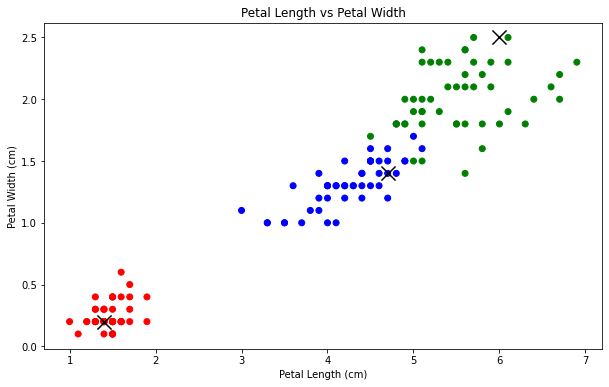

In [98]:
# plotting the points on the previous plot with a marker differentiating the three points.

plt.figure(figsize = (10, 6))
plt.scatter(df['PetalLengthCm'], df['PetalWidthCm'], c = df['Species'].apply(lambda x: c_dict[x]))
plt.scatter(test.iloc[0][1], test.iloc[0][2], c = 'black', marker = 'x', s = 200)
plt.scatter(test.iloc[1][1], test.iloc[1][2], c = 'black', marker = 'x', s = 200)
plt.scatter(test.iloc[2][1], test.iloc[2][2], c = 'black', marker = 'x', s = 200)
plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.title('Petal Length vs Petal Width')
plt.show()


We use the Mahalonobis distance as a distance metric to find the class of the test flowers 1, 51 and 101. Mahalanobis distance is a good similarity metric for the Iris dataset because it considers the correlations between petal length and petal width and uses a covariance matrix to transform the feature space into a new space with uncorrelated and standardized features. This leads to a more accurate computation of similarity and improved prediction of the class of test flowers. The Mahalanobis distance is also scale-invariant, making it useful for datasets with differing units of measurement.

5. Consider the following images. Obtain the histograms for each of the images. Using a suitable distance measure, find the distance between the query image and reference images.

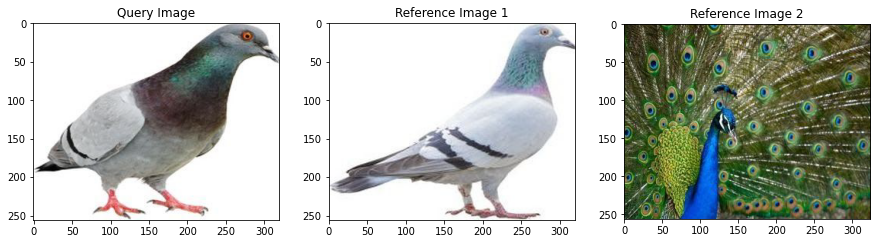

In [99]:
# importing the images and storing it in a cv2 object

query = cv2.imread('./queryimage.png')
ref1 = cv2.imread('./refimage1.png')
ref2 = cv2.imread('./refimage2.png')

# converting the images from BGR to RGB

query = cv2.cvtColor(query, cv2.COLOR_BGR2RGB)
ref1 = cv2.cvtColor(ref1, cv2.COLOR_BGR2RGB)
ref2 = cv2.cvtColor(ref2, cv2.COLOR_BGR2RGB)

# plotting the images

plt.figure(figsize = (15, 10))
plt.subplot(1, 3, 1)
plt.imshow(query)
plt.title('Query Image')
plt.subplot(1, 3, 2)
plt.imshow(ref1)
plt.title('Reference Image 1')
plt.subplot(1, 3, 3)
plt.imshow(ref2)
plt.title('Reference Image 2')
plt.show()

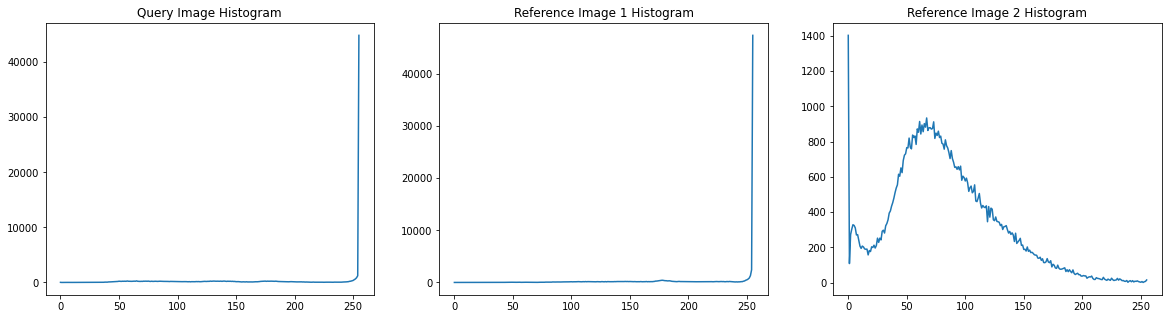

In [100]:
# obtain histograms using the function cv2.calcHist()

# query image histogram

query_hist = cv2.calcHist([query],[0],None,[256],[0,256])

# reference image 1 histogram

ref1_hist = cv2.calcHist([ref1],[0],None,[256],[0,256])

# reference image 2 histogram

ref2_hist = cv2.calcHist([ref2],[0],None,[256],[0,256])

plt.figure(figsize = (20, 5))
plt.subplot(1, 3, 1)
plt.plot(query_hist)
plt.title('Query Image Histogram')
plt.subplot(1, 3, 2)
plt.plot(ref1_hist)
plt.title('Reference Image 1 Histogram')
plt.subplot(1, 3, 3)
plt.plot(ref2_hist)
plt.title('Reference Image 2 Histogram')
plt.show()


In [101]:
# normalize the histograms 

query_hist = cv2.normalize(query_hist, query_hist, 0, 1, cv2.NORM_MINMAX, -1)

ref1_hist = cv2.normalize(ref1_hist, ref1_hist, 0, 1, cv2.NORM_MINMAX, -1)

ref2_hist = cv2.normalize(ref2_hist, ref2_hist, 0, 1, cv2.NORM_MINMAX, -1)

# calculate the bhattarcharya distance between the query image and the reference images

bhattarcharya_distance1 = cv2.compareHist(query_hist, ref1_hist, cv2.HISTCMP_BHATTACHARYYA)

bhattarcharya_distance2 = cv2.compareHist(query_hist, ref2_hist, cv2.HISTCMP_BHATTACHARYYA)

# print the bhattarcharya distance between the query image and the reference images

print("Bhattarcharya distance between query image and reference image 1: ", bhattarcharya_distance1)

print("Bhattarcharya distance between query image and reference image 2: ", bhattarcharya_distance2)


Bhattarcharya distance between query image and reference image 1:  0.1795303455684302
Bhattarcharya distance between query image and reference image 2:  0.6539633318674675


# Conclusion

We can see that bhattacharyya distance between query image and reference image 1 is less than bhattacharyya distance between query image and reference image 2 which means that query image is more similar to reference image 1 than reference image 2.  \
This is also evident from the histogram plots of the images. Histogram of reference image 1 is more similar to histogram of query image than histogram of reference image 2.